In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## data is in unit MWh och det finns 8760 rader (en per timme)
prod_data = pd.read_csv("2024_prod.csv", sep=';',)
consum_data = pd.read_csv("2024_consum.csv", sep=";")
andel_data = pd.read_csv("energibalans.csv", sep=",") 

In [4]:
andel_data

,Year,Scenario,Prod_total,Vattenkraft,Karnkraft,Ovrig_termisk,Vind_hav,Vind_land,Solkraft,Kons_ovrig,Kons_vatgas,Spill,Nettoexport
0,2025,FM,191,69,51,14,1,53,7,NaN,NaN,NaN,NaN
1,2025,SF,212,62,42,13,3,79,8,NaN,NaN,NaN,NaN
2,2035,FM,224,69,47,13,7,81,9,NaN,NaN,NaN,NaN
3,2035,EP,260,69,75,15,10,102,13,NaN,NaN,NaN,NaN
4,2035,EF,266,69,69,14,18,132,12,NaN,NaN,NaN,NaN
5,2045,SF,233,70,0,13,3,134,12,NaN,NaN,NaN,NaN
6,2045,FM,260,70,58,13,7,96,16,NaN,NaN,NaN,NaN
7,2045,EP,331,68,110,16,24,196,19,NaN,NaN,NaN,NaN
8,2045,EF,342,67,67,14,67,196,22,NaN,NaN,NaN,NaN


In [ ]:
## Bara Data hantering inte viktig för redovisningen
import numpy as np
import re

def _to_float_locale(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    # remove normal and non-breaking spaces
    s = s.replace('\xa0', '').replace(' ', '')
    # if both dot and comma present, assume dot is thousands sep and comma decimal sep
    if '.' in s and ',' in s:
        s = s.replace('.', '').replace(',', '.')
    else:
        s = s.replace(',', '.')
    # keep only digits, dot and minus
    s = re.sub(r'[^\d\.\-]', '', s)
    try:
        return float(s)
    except:
        return np.nan


In [6]:
## gör om alla värden till float
prod_data['Production Total [MWh]'] = prod_data['Production Total [MWh]'].apply(_to_float_locale)
prod_data['Hydro [MWh]'] = prod_data['Hydro [MWh]'].apply(_to_float_locale)
prod_data['Nuclear [MWh]'] = prod_data['Nuclear [MWh]'].apply(_to_float_locale)
prod_data['Solar [MWh]'] = prod_data['Solar [MWh]'].apply(_to_float_locale)
prod_data['Thermal [MWh]'] = prod_data['Thermal [MWh]'].apply(_to_float_locale)
prod_data['Wind Onshore [MWh]'] = prod_data['Wind Onshore [MWh]'].apply(_to_float_locale)
prod_data['Wind Offshore [MWh]'] = prod_data['Wind Offshore [MWh]'].apply(_to_float_locale)
prod_data['Energy Storage [MWh]'] = prod_data['Energy Storage [MWh]'].apply(_to_float_locale)
prod_data['Other [MWh]'] = prod_data['Other [MWh]'].apply(_to_float_locale)

consum_data['Consumption Total [MWh]'] = consum_data['Consumption Total [MWh]'].apply(_to_float_locale)

In [7]:
print(prod_data['Production Total [MWh]'].sum()/1000000)
print(prod_data['Hydro [MWh]'].sum()/1000000)

161.939435469791
64.389160641381


In [8]:
consum_data['Consumption Total [MWh]']= consum_data['Consumption Total [MWh]']*-1
consum_data['Consumption Total [MWh]'].sum()/1000000 # in TWh

np.float64(128.508114290807)

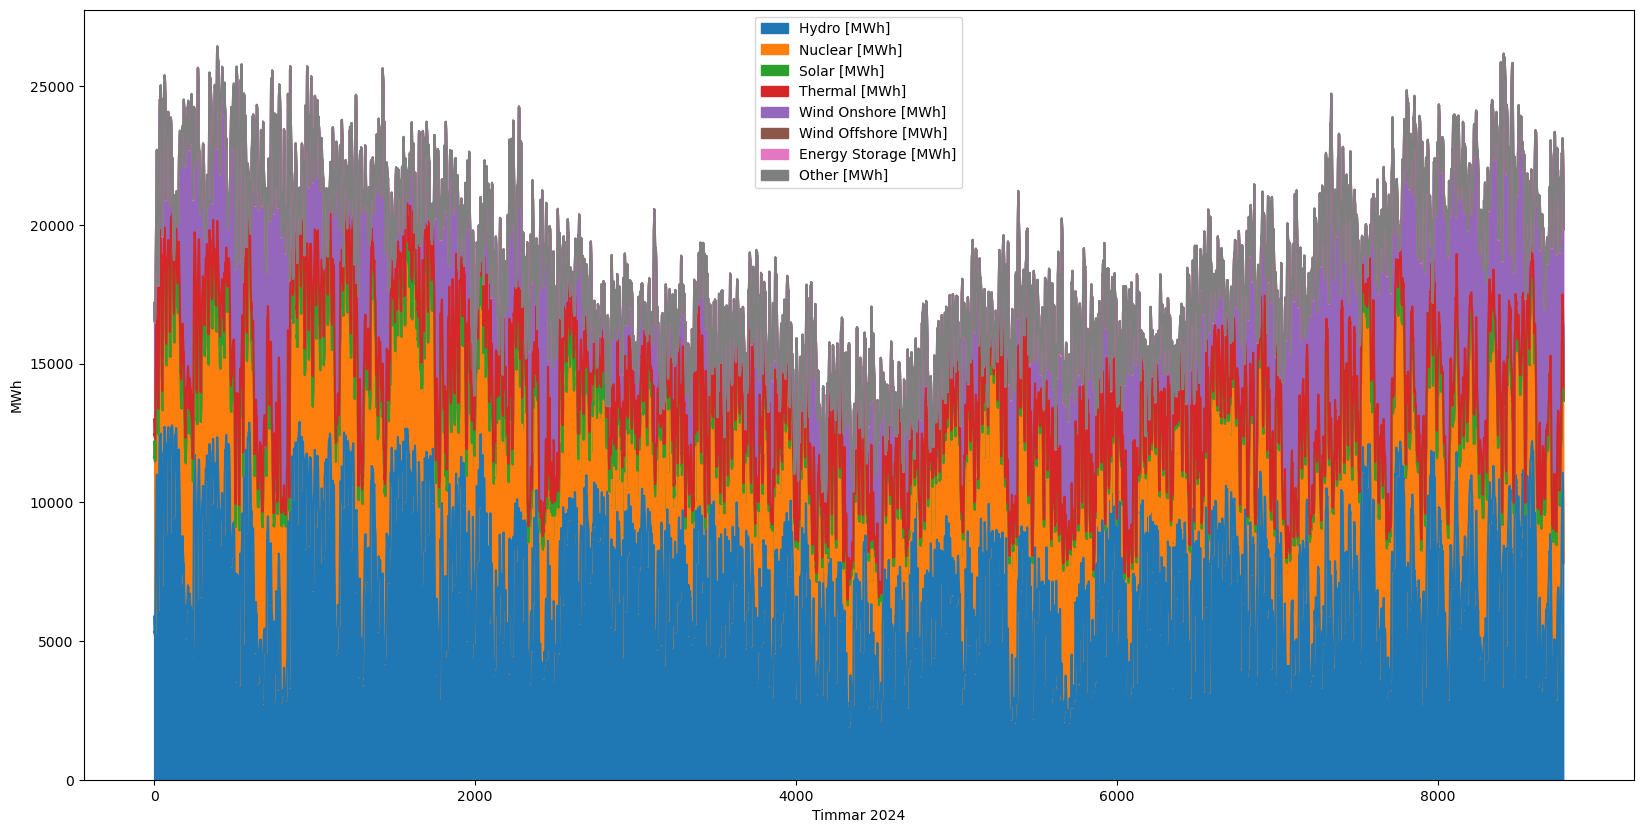

In [9]:
## alla prod källor (stacked graf)
ax_3 = pd.concat([prod_data["Hydro [MWh]"], prod_data["Nuclear [MWh]"],prod_data['Solar [MWh]'], prod_data['Thermal [MWh]'],prod_data['Wind Onshore [MWh]'],prod_data['Wind Offshore [MWh]'],prod_data['Energy Storage [MWh]'],prod_data['Other [MWh]']    ],axis=1).plot.area(figsize=(20, 10), stacked=True)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

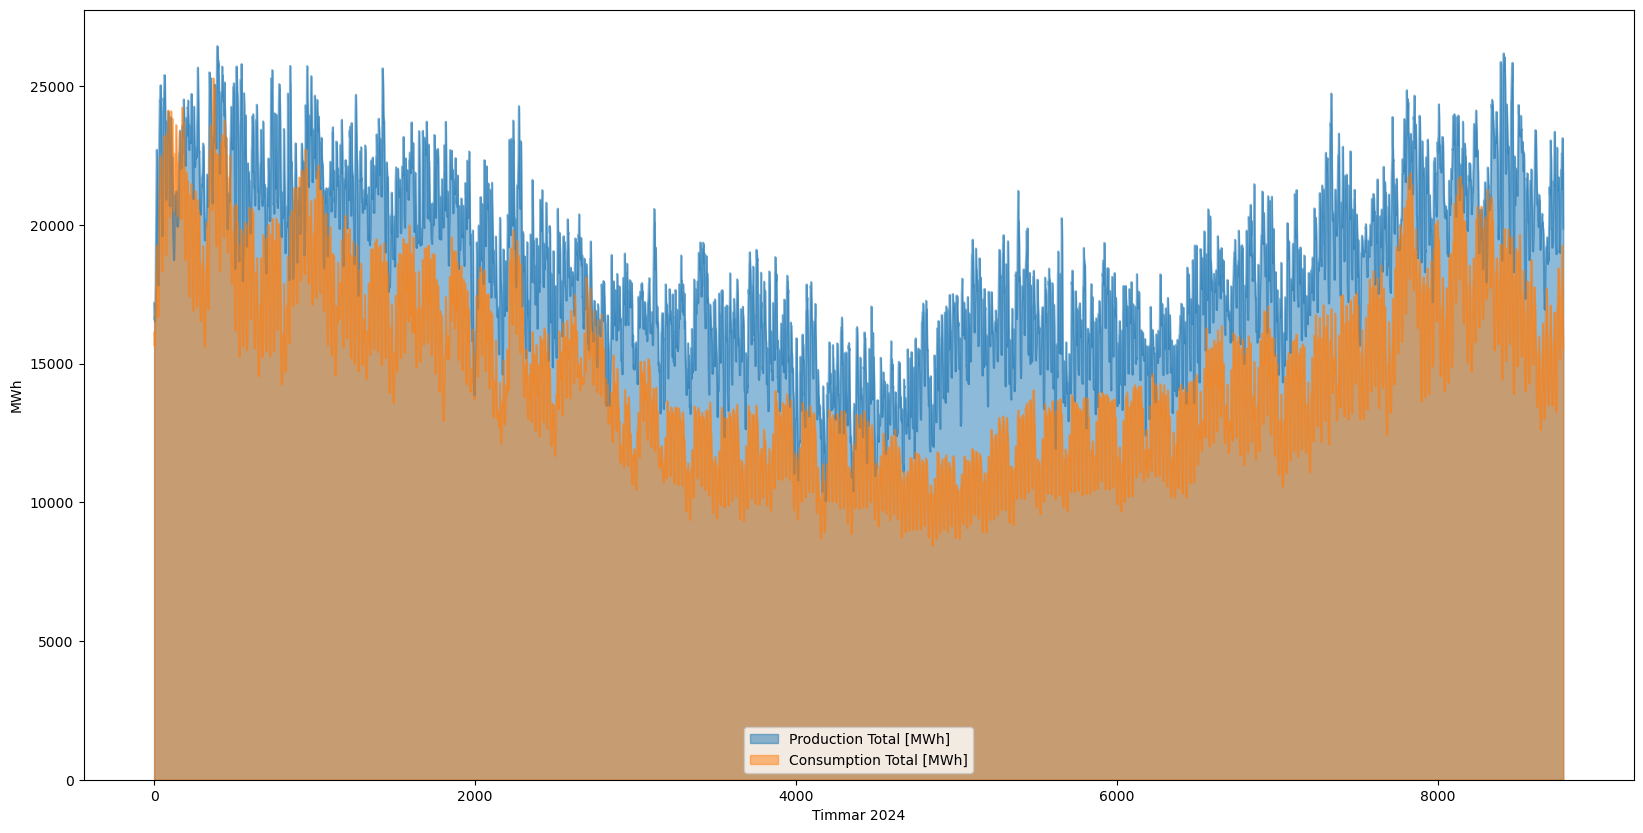

In [10]:
## Plottar 2024 prod och last
ax_3 = pd.concat([prod_data['Production Total [MWh]'] , consum_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [11]:
##  Ökning av total last till 300 TWh under 2024 -----------------------------------------------------------------------------------------------------------------------------------
consum_300_data = consum_data.copy()
consum_300_data['Consumption Total [MWh]'] = consum_300_data['Consumption Total [MWh]'] * (300000000/consum_300_data['Consumption Total [MWh]'].sum())

In [ ]:
#kollar att det blev rätt
consum_300_data['Consumption Total [MWh]'].sum()/1000000

np.float64(300.0)

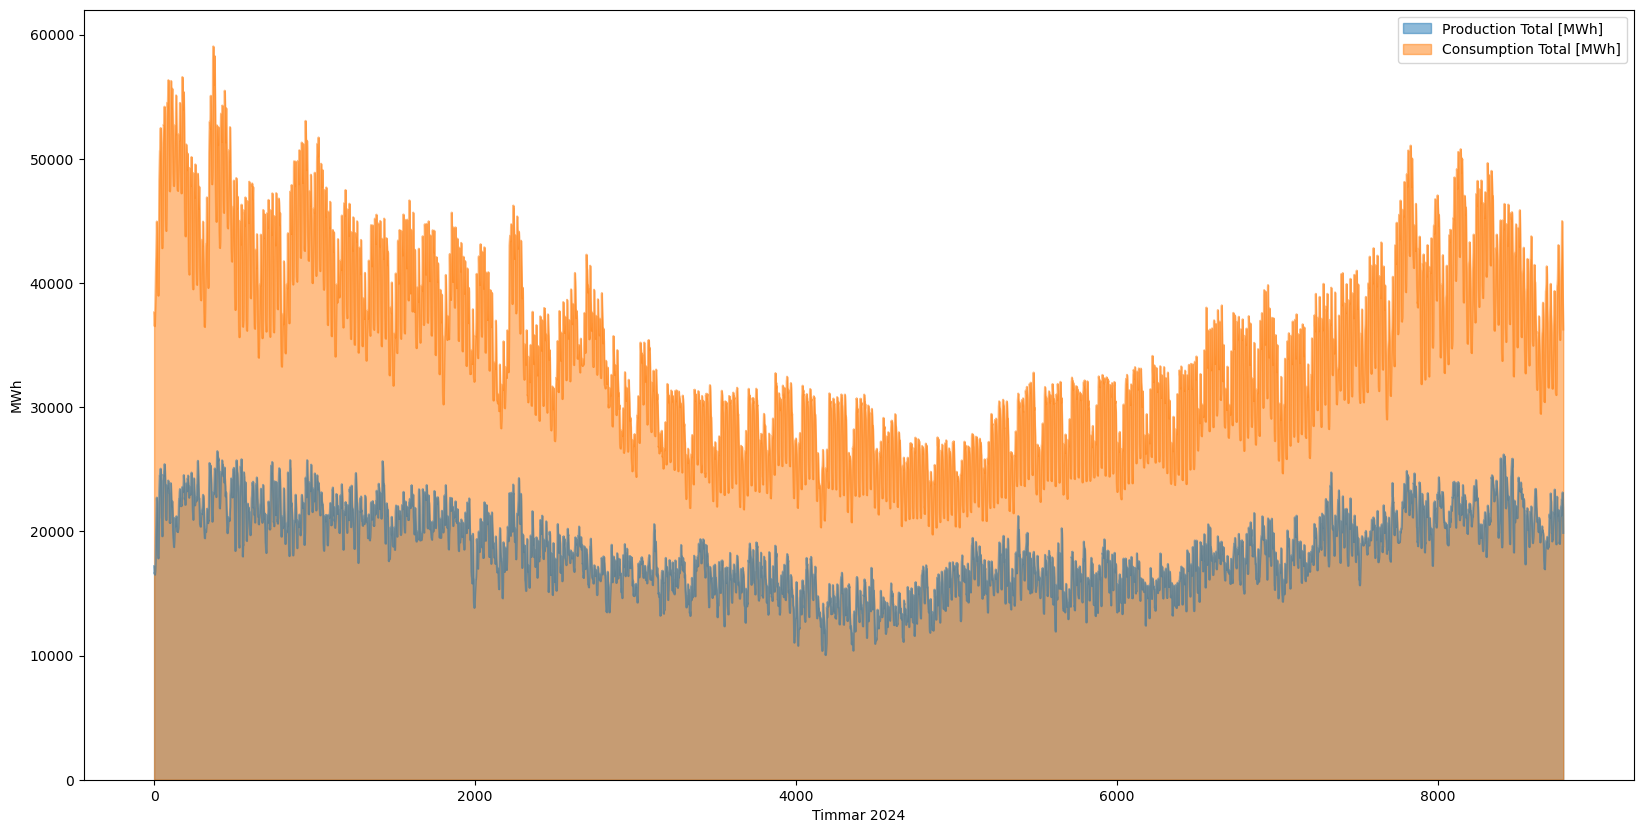

In [ ]:
## Plottar 2024 prod och 300TWh last
ax_3 = pd.concat([prod_data['Production Total [MWh]'] , consum_300_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [ ]:
## Olika senarier -----------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# ej relevant för redovisningen
prod_vind_data_5 = prod_data.copy()


In [ ]:
## olika senarier för ökad produktion från olika källor. note! tänkinte förmycket på vad det gångas med. vaiabel namn stämmer inte så bra så det är prod_vind_data_5 betyder inget.
#[vatten, kärnkraft, övrig termisk, vind total, solkraft]
#FM [70, 58, 13 , 103 , 16]
'''prod_vind_data_5['Hydro [MWh]'] = prod_vind_data_5['Hydro [MWh]']*1.1
prod_vind_data_5['Nuclear [MWh]'] = prod_vind_data_5['Nuclear [MWh]']*1.2
prod_vind_data_5['Thermal [MWh]'] = prod_vind_data_5['Thermal [MWh]']*2.42
prod_vind_data_5['Wind Onshore [MWh]'] = prod_vind_data_5['Wind Onshore [MWh]']*2.525
prod_vind_data_5['Solar [MWh]'] = prod_vind_data_5['Solar [MWh]']*6.5'''


#[vatten, kärnkraft, övrig termisk, vind total, solkraft]
#EP [68, 110, 16 , 193 , 19]
'''prod_vind_data_5['Hydro [MWh]'] = prod_vind_data_5['Hydro [MWh]']*1.06
prod_vind_data_5['Nuclear [MWh]'] = prod_vind_data_5['Nuclear [MWh]']*2.26
prod_vind_data_5['Thermal [MWh]'] = prod_vind_data_5['Thermal [MWh]']*3
prod_vind_data_5['Wind Onshore [MWh]'] = prod_vind_data_5['Wind Onshore [MWh]']*4.73
prod_vind_data_5['Solar [MWh]'] = prod_vind_data_5['Solar [MWh]']*7.74'''


#[vatten, kärnkraft, övrig termisk, vind total, solkraft]
#Ef [67, 67, 14 , 263 , 22]
'''prod_vind_data_5['Hydro [MWh]'] = prod_vind_data_5['Hydro [MWh]']*1.04
prod_vind_data_5['Nuclear [MWh]'] = prod_vind_data_5['Nuclear [MWh]']*1.38
prod_vind_data_5['Thermal [MWh]'] = prod_vind_data_5['Thermal [MWh]']*2.6
prod_vind_data_5['Wind Onshore [MWh]'] = prod_vind_data_5['Wind Onshore [MWh]']*6.45
prod_vind_data_5['Solar [MWh]'] = prod_vind_data_5['Solar [MWh]']*9'''

## ökning av enskilda källor. tex kärnkraft 4 gånger, vind 10 gånger, sol 20 gånger
#prod_vind_data_5['Hydro [MWh]'] = prod_vind_data_5['Hydro [MWh]']*1.1
prod_vind_data_5['Nuclear [MWh]'] = prod_vind_data_5['Nuclear [MWh]']*4
#prod_vind_data_5['Thermal [MWh]'] = prod_vind_data_5['Thermal [MWh]']*2.42
#prod_vind_data_5['Wind Onshore [MWh]'] = prod_vind_data_5['Wind Onshore [MWh]']*10
#prod_vind_data_5['Solar [MWh]'] = prod_vind_data_5['Solar [MWh]']*20



In [ ]:
# ej relvant för redovisningen
prod_vind_data_5['Solar [MWh]'].sum()/1000000

np.float64(2.4633649062049994)

In [ ]:
# ej relvant för redovisningen
prod_vind_data_5['Production Total [MWh]'] = prod_vind_data_5.iloc[:,4:].sum(axis=1)

In [ ]:
# ej relvant för redovisningen
prod_vind_data_5['Production Total [MWh]'].sum()/1000000

np.float64(308.1569117644731)

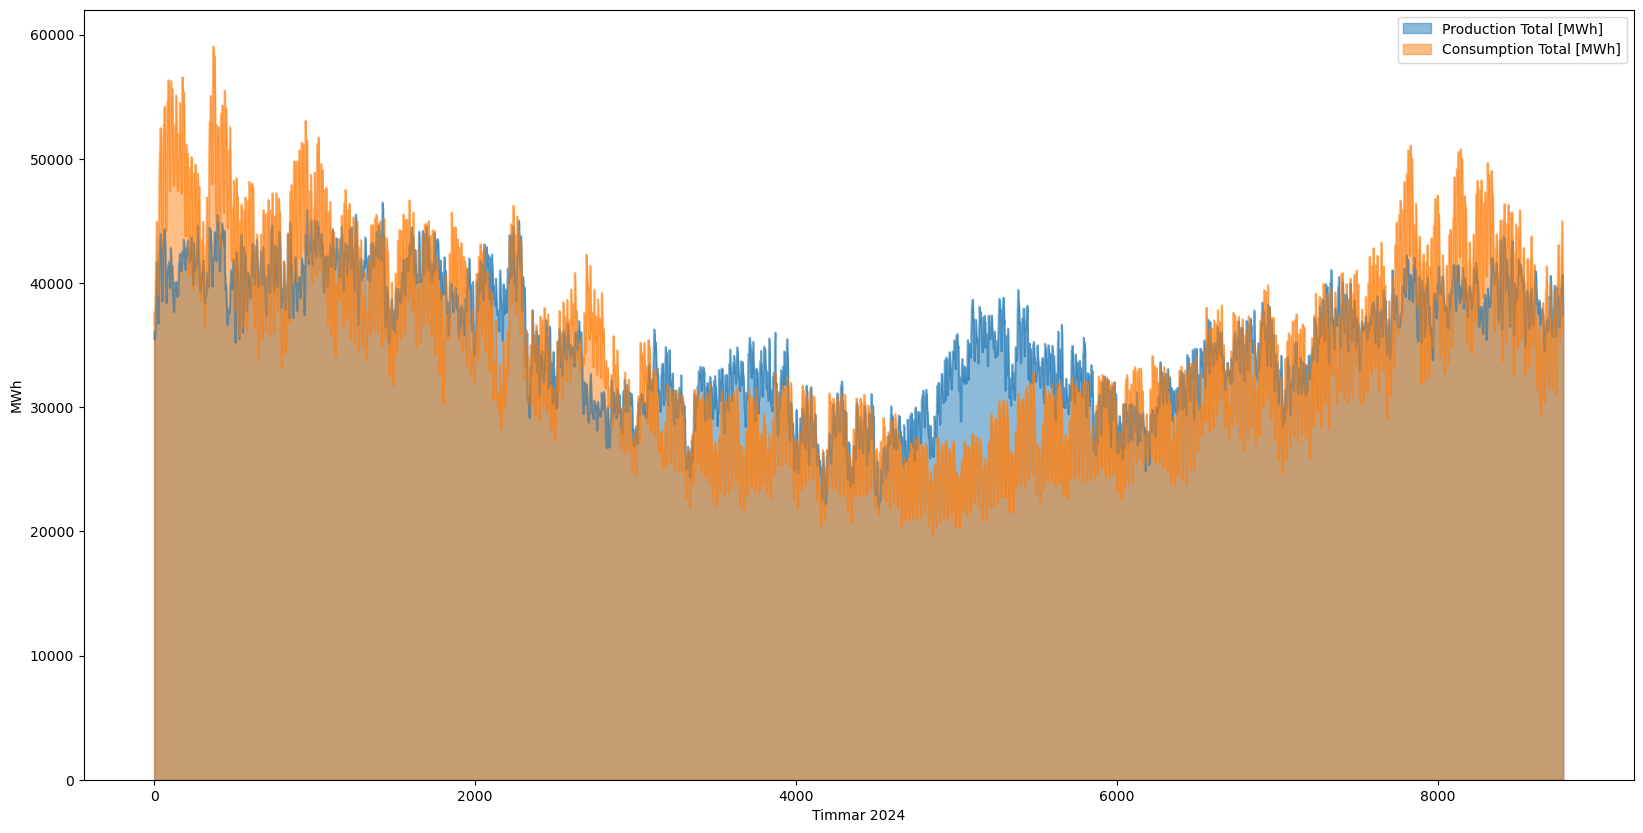

In [310]:
## Plottar 2024 prod och 300TWh last
ax_3 = pd.concat([prod_vind_data_5['Production Total [MWh]'] , consum_300_data['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [311]:
## kalkulerar behovet av lagring
prod_vind_data_5["storage"] = 0
prod_vind_data_5["Consumption Total [MWh]"] = consum_300_data['Consumption Total [MWh]']

In [ ]:
## ger bara max av momentär skilland 10 GWh
for index, row in prod_vind_data_5.iterrows():
    if (prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]) and ((prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) > 10000):
        if index != 0:
            prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) -10000
    else:
        prod_vind_data_5["storage"][index] = 0

C:\Users\f'\AppData\Local\Temp\ipykernel_7284\93648113.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prod_vind_data_5["storage"][index] = 0
C:\Users\f'\AppData\Local\Temp\ipykernel_7284\93648113.py:8: SettingWithCopyWarning: 
A value i

In [ ]:
## ger bara max av momentär skilland utan 10 GWh annars samma som åvan 
for index, row in prod_vind_data_5.iterrows():
    
    if (prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]) :
        if index != 0:
            prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) 
    else:
        prod_vind_data_5["storage"][index] = 0

C:\Users\f'\AppData\Local\Temp\ipykernel_7284\1479331266.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - pr

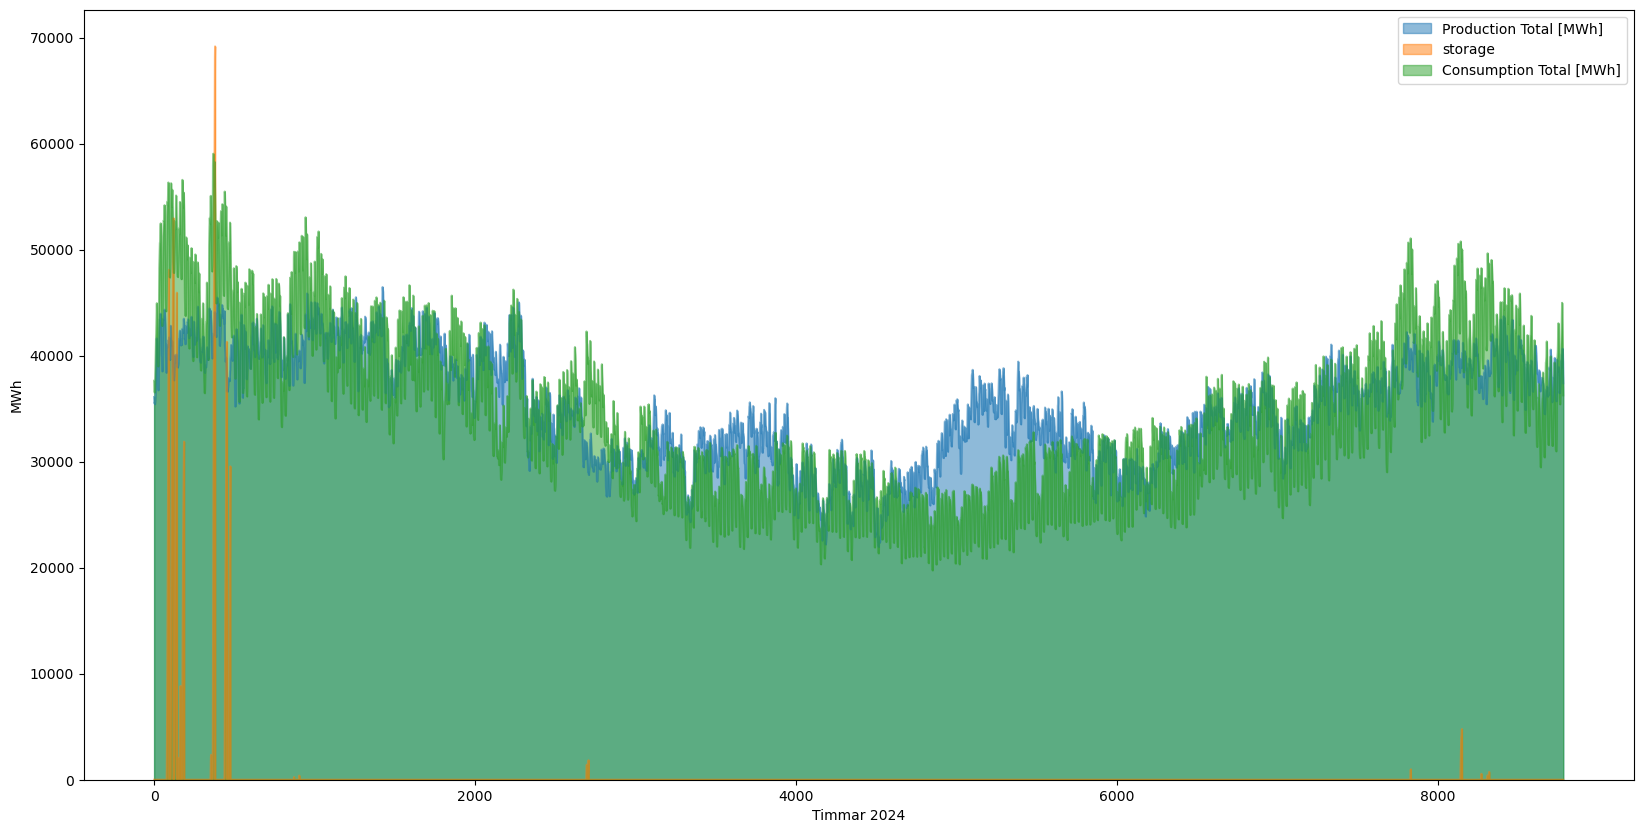

In [ ]:
## skit i denna grafen
## Plottar 2024 prod och 300TWh last
ax_3 = pd.concat([prod_vind_data_5['Production Total [MWh]'], prod_vind_data_5['storage'], prod_vind_data_5['Consumption Total [MWh]'] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Timmar 2024')
ax_3.set_ylabel('MWh')
plt.show()

In [ ]:
## Visar max lagrings behov i TWh
prod_vind_data_5['storage'].max()/1000

69.16859000179512

In [ ]:
## Duration graf
## ökad prod och lagring med ett finns import tillskott
# TODO  gör denna stand alone så att det inte påverkar tidigare kod
prod_vind_data_5["pos_dif"] = 0
prod_vind_data_5["neg_dif"] = 0

In [ ]:
## ger bara max av momentär skilland  med 10 GWh
for index, row in prod_vind_data_5.iterrows():
    if (prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]) & ((prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) > 10000):
            prod_vind_data_5["neg_dif"][index] = (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index]) -10000
    elif((prod_vind_data_5['Consumption Total [MWh]'][index] < prod_vind_data_5['Production Total [MWh]'][index])):
        prod_vind_data_5["neg_dif"][index] =(prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])

C:\Users\f'\AppData\Local\Temp\ipykernel_7284\1397447437.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prod_vind_data_5["neg_dif"][index] = (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'

In [ ]:
## ger bara max av momentär skilland utan 10 GWh
for index, row in prod_vind_data_5.iterrows():
    if (prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]):
            prod_vind_data_5["neg_dif"][index] = (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])
    elif((prod_vind_data_5['Consumption Total [MWh]'][index] < prod_vind_data_5['Production Total [MWh]'][index])):
        prod_vind_data_5["neg_dif"][index] =(prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])

C:\Users\f'\AppData\Local\Temp\ipykernel_7284\2970838170.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prod_vind_data_5["neg_dif"][index] = (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'

In [ ]:
## ger bara max skilland
for index, row in prod_vind_data_5.iterrows():
    if prod_vind_data_5['Consumption Total [MWh]'][index] > prod_vind_data_5['Production Total [MWh]'][index]:
        if index != 0:
            prod_vind_data_5["storage"][index] = prod_vind_data_5["storage"][index-1] + (prod_vind_data_5['Consumption Total [MWh]'][index] - prod_vind_data_5['Production Total [MWh]'][index])
    else:
        prod_vind_data_5["storage"][index] = 0

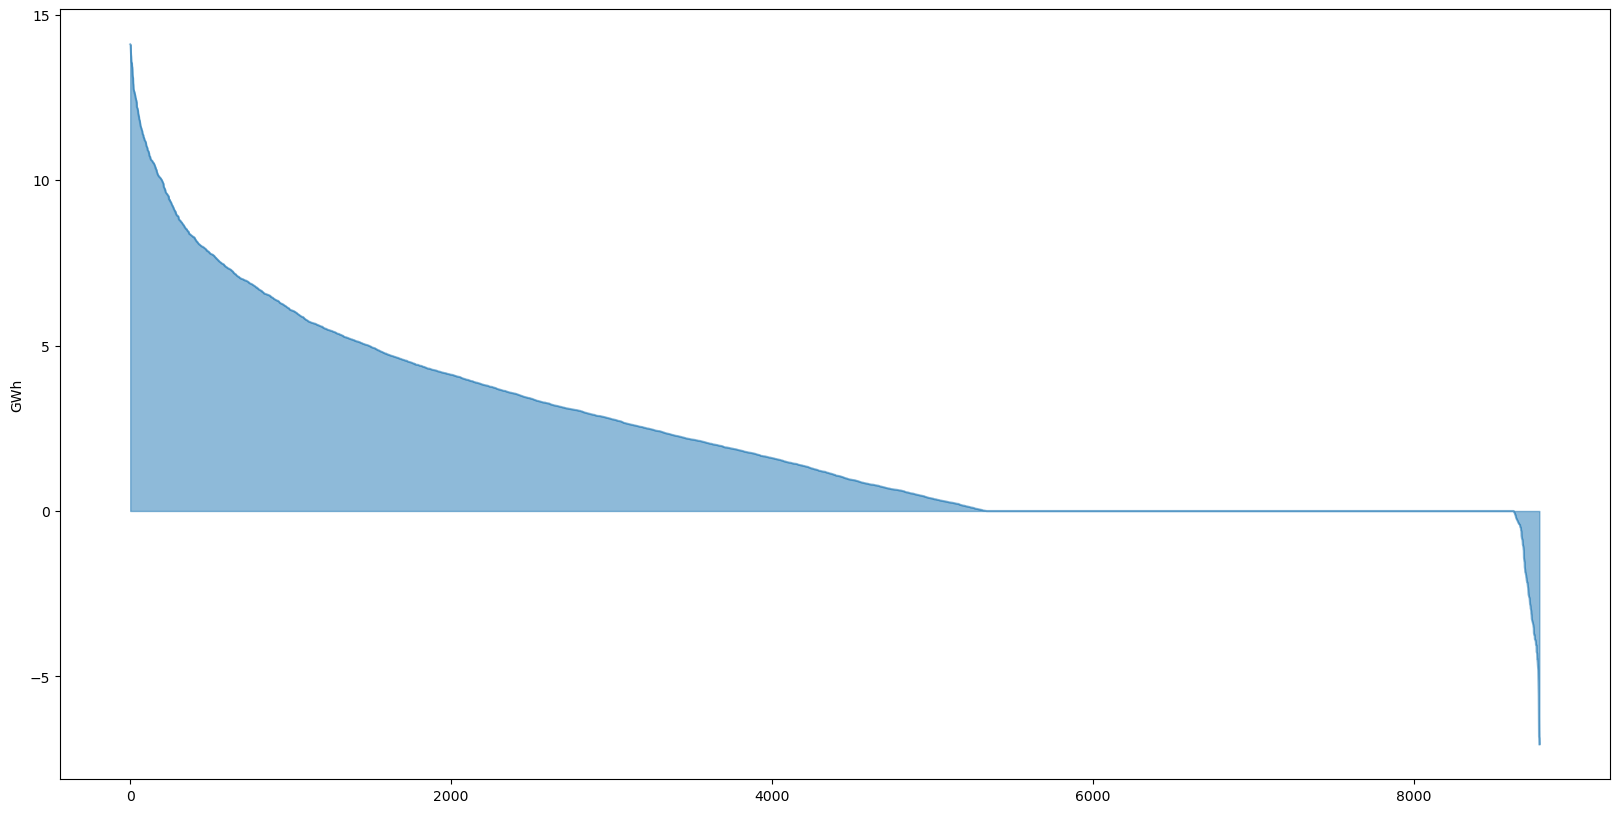

In [ ]:
## duration kurva för accumilerad lagring
prod_vind_data_5["neg_dif"] = prod_vind_data_5["neg_dif"].sort_values( ascending=True)
ax_3 = ((prod_vind_data_5["neg_dif"]*-1).sort_values( ascending=False).reset_index()['neg_dif']/1000).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_ylabel('GWh')
plt.show()

In [ ]:
## Allt under här är bara ignorerat kod som inte används längre -----------------------------------------------------------------------------------------------------------------------------------
# --- IGNORE ---

In [64]:


'''## duration kurva för accumilerad lagring
duration_curve_data = prod_vind_data_5["neg_dif"].sort_values( ascending=True)*-1
duration_curve_data = duration_curve_data.reset_index()
duration_curve_data
#duration_curve_data.reset_index()["storage"].plot.area(figsize=(20, 10))
duration_curve_data_1 = prod_vind_data_5['pos_dif'].sort_values( ascending=False)
duration_curve_data_1 = duration_curve_data_1.reset_index()
duration_curve_data_1
#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))
combined_data = pd.concat([duration_curve_data["neg_dif"], duration_curve_data_1["pos_dif"] ],axis=0).sort_values(ascending=False)/1000
combined_data = combined_data.reset_index(drop=True)
combined_data
#
ax_3 =combined_data.plot.area(figsize=(20, 10), stacked=False)
#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))
ax_3.set_xlabel('index')
ax_3.set_ylabel('GWh')
plt.show()'''

'## duration kurva för accumilerad lagring\nduration_curve_data = prod_vind_data_5["neg_dif"].sort_values( ascending=True)*-1\nduration_curve_data = duration_curve_data.reset_index()\nduration_curve_data\n#duration_curve_data.reset_index()["storage"].plot.area(figsize=(20, 10))\nduration_curve_data_1 = prod_vind_data_5[\'pos_dif\'].sort_values( ascending=False)\nduration_curve_data_1 = duration_curve_data_1.reset_index()\nduration_curve_data_1\n#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))\ncombined_data = pd.concat([duration_curve_data["neg_dif"], duration_curve_data_1["pos_dif"] ],axis=0).sort_values(ascending=False)/1000\ncombined_data = combined_data.reset_index(drop=True)\ncombined_data\n#\nax_3 =combined_data.plot.area(figsize=(20, 10), stacked=False)\n#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))\nax_3.set_xlabel(\'index\')\nax_3.set_ylabel(\'GWh\')\nplt.show()'

In [641]:
#prod_vind_data_total_1 = combined_data.copy()
#prod_vind_data_total_2= combined_data.copy()
prod_vind_data_total_3 = combined_data.copy()

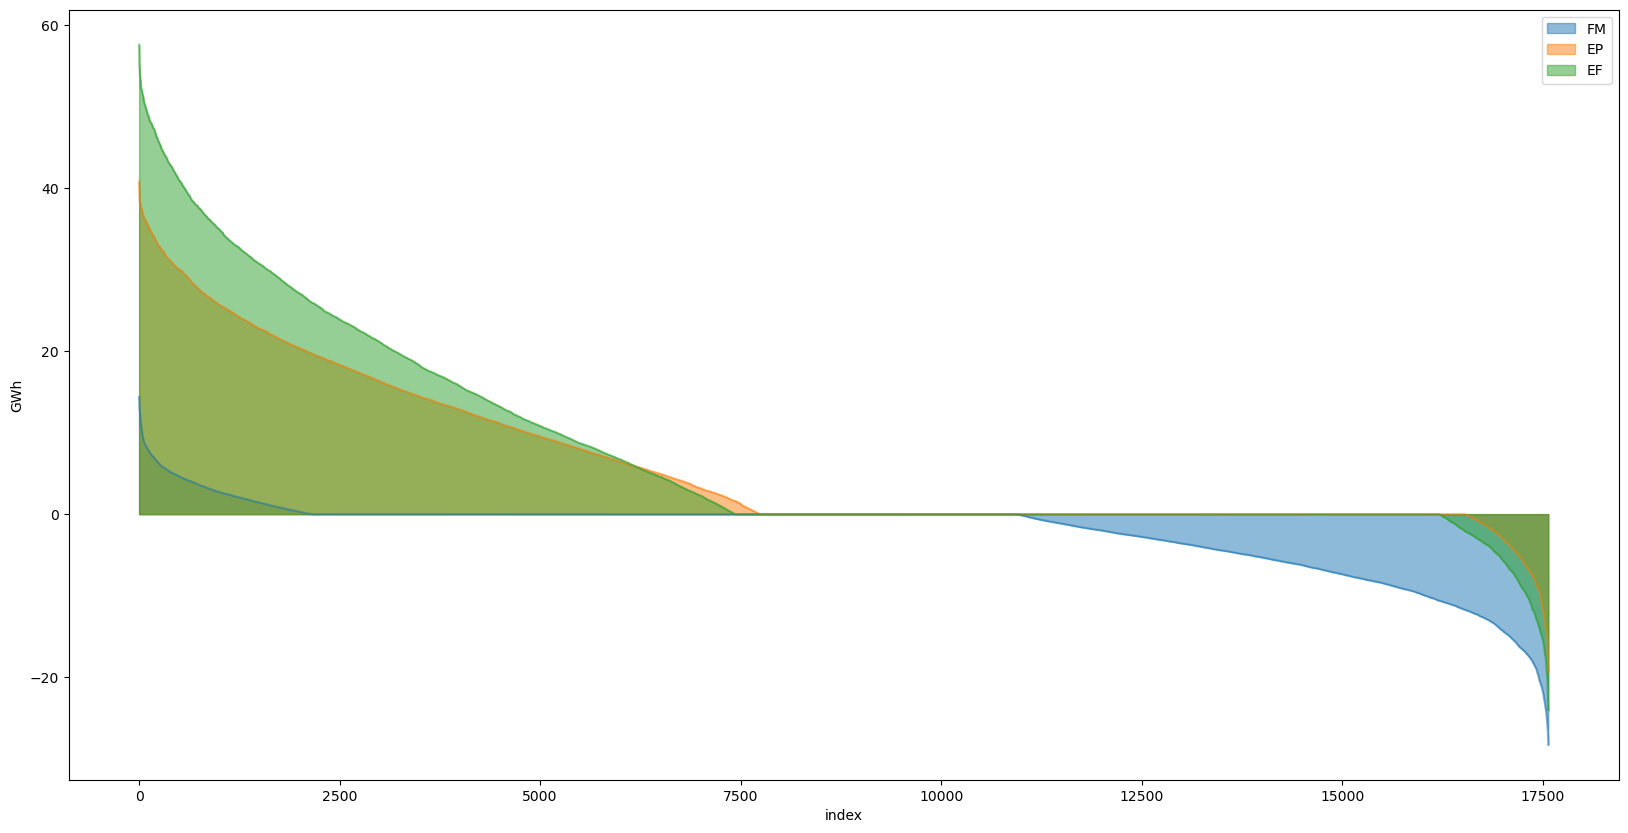

In [668]:
d = pd.concat([prod_vind_data_total_1, prod_vind_data_total_2, prod_vind_data_total_3 ],axis=1)
d.columns = ['FM', 'EP', 'EF']
ax_4 =d.plot.area(figsize=(20, 10), stacked=False)
#duration_curve_data_1.reset_index()["storage"].plot.area(figsize=(20, 10))
ax_4.set_xlabel('index')
ax_4.set_ylabel('GWh')
plt.show()

In [585]:
prod_vind_data_total

,Date/Time CET/CEST,Date/Time UTC,MBA,Production Total [MWh],Hydro [MWh],Nuclear [MWh],Solar [MWh],Thermal [MWh],Wind Onshore [MWh],Wind Offshore [MWh],Energy Storage [MWh],Other [MWh],FM,EP,EF
0,01.01.2024/00:00,31.12.2023/23:00,"SE1, SE2, SE3, SE4",17194.164211,5881.938064,6300.99,0.939435,809.767436,4172.928605,0.0,0.000000,27.600671,14.387391,40.815598,57.600589
1,01.01.2024/01:00,01.01.2024/00:00,"SE1, SE2, SE3, SE4",16892.208784,5607.845686,6302.19,0.939513,802.489977,4149.314518,0.0,0.000000,29.429090,13.899120,40.157998,56.168669
2,01.01.2024/02:00,01.01.2024/01:00,"SE1, SE2, SE3, SE4",16664.755900,5383.490754,6301.92,0.971884,795.055549,4153.782483,0.0,0.000000,29.535230,13.657188,39.535397,55.365003
3,01.01.2024/03:00,01.01.2024/02:00,"SE1, SE2, SE3, SE4",16594.797267,5281.014751,6302.21,0.919221,808.631964,4172.891047,0.0,0.000000,29.130284,13.507339,39.385686,55.052444
4,01.01.2024/04:00,01.01.2024/03:00,"SE1, SE2, SE3, SE4",16705.257082,5362.254030,6302.80,0.981863,816.435979,4192.743722,0.0,0.000000,30.041488,13.040964,39.331520,54.921787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31.12.2024/19:00,31.12.2024/18:00,"SE1, SE2, SE3, SE4",23134.888010,11071.409683,5839.69,1.507701,587.437576,5619.815280,0.0,3.182586,11.845184,-0.000000,0.000000,-0.000000
8780,31.12.2024/20:00,31.12.2024/19:00,"SE1, SE2, SE3, SE4",23112.690303,10814.311539,5839.29,2.658814,561.721017,5878.773727,0.0,3.083820,12.851386,-0.000000,0.000000,-0.000000
8781,31.12.2024/21:00,31.12.2024/20:00,"SE1, SE2, SE3, SE4",22640.390382,10533.869627,5840.82,3.557847,550.798398,5680.637060,0.0,2.179222,28.528228,-0.000000,0.000000,-0.000000
8782,31.12.2024/22:00,31.12.2024/21:00,"SE1, SE2, SE3, SE4",21897.156155,9874.359918,5841.14,2.235744,498.851834,5646.601684,0.0,2.203276,31.763699,-0.000000,0.000000,-0.000000
